In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections.abc import Callable
from typing import Literal

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
inpDir = os.path.join( '..', 'input')


###moduleDir = 'MACHINE LEARNING'

outDir = os.path.join('output')


# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE)

NOISE = 0.1
N_SAMPLES = 1280
ALPHA = 0.1     # learning rate
EPOCHS = 20001
NUM_HIDDEN = 5

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

<Figure size 1500x600 with 0 Axes>

In [3]:
def fn_plot_decision_boundary(pred_func: Callable[[], np.float64], X_tr: np.ndarray, y_tr: np.ndarray, X_ts :  np.ndarray, y_ts:  np.ndarray,):
    '''
        Attrib:
           pred_func : function based on predict method of the classifier
           X_tr : train feature matrix
           y_tr : train labels
           X_ts : test feature matrix
           y_ts : test labels
       Return:
           None
    '''
    
    # Set min and max values and give it some padding
    xMin, xMax = X_tr[:, 0].min() - .05, X_tr[:, 0].max() + .05
    yMin, yMax = X_tr[:, 1].min() - .05, X_tr[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    ax = fig.add_axes(111)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, cmap=CMAP) #, alpha = 0.8
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr,
                                  s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=y_ts,
                                  s=150, marker = '*',edgecolor='k', cmap=plt.cm.inferno )


In [4]:
X, y = datasets.make_moons(n_samples = N_SAMPLES, shuffle = True, noise = NOISE, random_state = RANDOM_STATE)

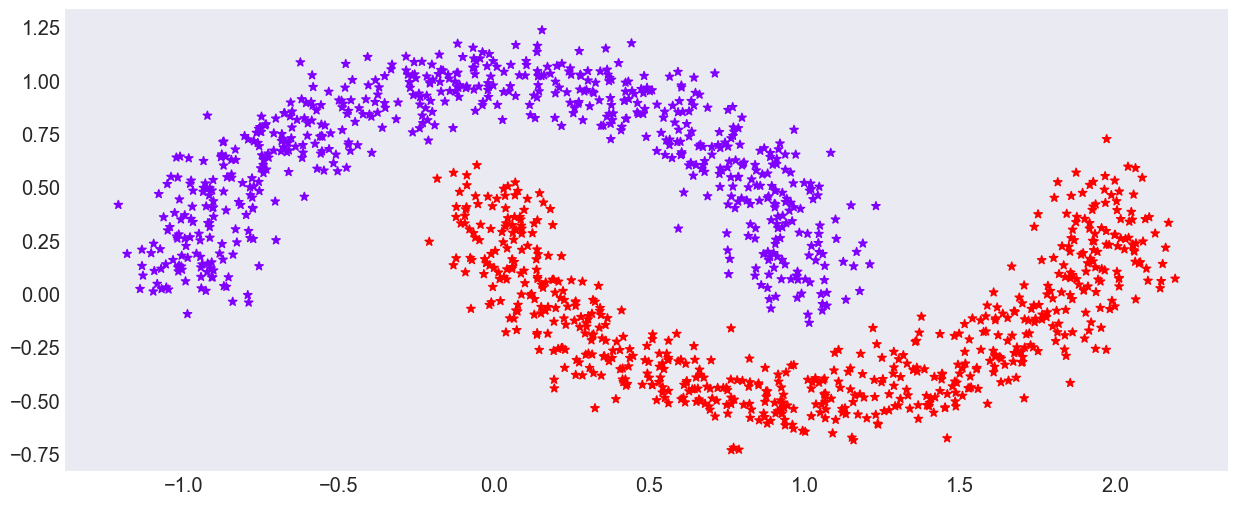

In [5]:
# Lets Plot the data
plt.scatter(X[:,0], X[:,1], s=40, c=y, marker='*', cmap=CMAP)

plt.grid()

In [6]:
#  Split the data in training and test sets to measure performance of the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE )

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1024, 2) (1024,) (256, 2) (256,)


In [7]:
X_train = X_train.astype(np.float32)

X_test = X_test.astype(np.float32)

y_train = y_train.astype(np.float32)

y_test = y_test.astype(np.float32)

In [8]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [9]:
def fn_sigmoid(z : np.ndarray) -> np.ndarray:
    '''
    Args:
        z : a matrix of z values of shape(m, n_output)
    returns:
        a matrix containing sigmoid values of z
    '''
    
    return 1 / (1 + np.exp(-z))

In [10]:
sm = fn_sigmoid(np.asarray([[-1, 0., 1.], [-np.inf, 0., np.inf]]))
print (sm)

[[0.269 0.5   0.731]
 [0.    0.5   1.   ]]


In [11]:
def fn_tanh(z: np.ndarray) -> np.ndarray:
    
    '''
    Args:
        z : array, Aggregated values
    Return : 
        Activations for each Z
    '''
    
    return np.tanh(z)

def fn_tanh_prime(a: np.ndarray) -> np.ndarray:
    
    '''
    Args:
        a : array, Aggregated values
    Return : 
        Derivative, for each a
    '''
    
    return 1.0 - np.tanh(a) ** 2

In [12]:
fn_tanh(np.asarray([[-1,0., 1.], [-np.inf, 0., np.inf]]))

array([[-0.762,  0.   ,  0.762],
       [-1.   ,  0.   ,  1.   ]])

In [13]:
np.tanh(0.5)

0.46211715726000974

In [14]:
(1 - np.power(np.tanh(0.5),2))

0.7864477329659274

In [15]:
fn_tanh_prime(0.5)

0.7864477329659274

In [16]:
# A function to make predictions

def predict(model: dict, X: np.ndarray) -> Literal:
    
    '''
    Args:
        model
        X: input features
    return:
        Predictions against the instances
    '''
    
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    z1 = X.dot(W1) + b1     # Aggregation
    a1 = fn_tanh(z1)      # Activation
        
    # Layer 2
    z2 = a1.dot(W2) + b2
    a2 = fn_sigmoid(z2)
    
    return a2 >= 0.5

In [17]:
# A function to make predictions

def calculate_loss(model: dict, X: np.ndarray, y: np.ndarray) -> np.float64:
    
    '''
    Args:
        model
        X: input features
    return:
        Predictions against the instances
    '''
    
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    m = X.shape[0]
    
    z1 = X.dot(W1) + b1     # Aggregation
    a1 = fn_tanh(z1)      # Activation
        
    # Layer 2
    z2 = a1.dot(W2) + b2
    a2 = fn_sigmoid(z2)
    
    data_loss = -(y* np.log(a2)).sum()
    
    return 1./m * data_loss

In [18]:
# Prepare the Model
def build_model(nn_hdim : np.int64,
               X : np.ndarray,
               y : np.ndarray,
               epochs : np.int64 = EPOCHS,
               alpha : np.float64 = ALPHA) -> dict:
    
    W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    
    b1 = np.zeros ((1, nn_hdim))
    b2 = np.zeros ((1, nn_output_dim))
    
    curr_loss = 0
    m = X.shape[0]
    
    loss = []
    epoch = []
    
    for i in range (0, epochs):
        
        #### Forward Propagation
        
        # Layer 1
        z1 = X.dot(W1) + b1     # Aggregation
        a1 = fn_tanh(z1)      # Activation
        
        # Layer 2
        z2 = a1.dot(W2) + b2
        a2 = fn_sigmoid(z2)
        
        #### Back Propagation
        
        # Layer 2
        dz2 = a2 - y
        
        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), 'Shape of W2{} and shape of dW2{}'.format(W2.shape, dW2.shape)
        
        db2 = np.sum(dz2, axis = 0, keepdims = True)
        assert(b2.shape == db2.shape), 'Shape of b2{} and shape of db2{}'.format(b2.shape, db2.shape)
        
        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), 'Shape of a1{} and shape of da1{}'.format(a1.shape, da1.shape)
        
        # Layer 1
        
        dz1 = da1 * fn_tanh_prime(z1)
        assert(z1.shape == dz1.shape), 'Shape of z1{} and shape of dz1{}'.format(z1.shape, dz1.shape)
        
        dW1 = (X.T).dot(dz1)
        assert(W1.shape == dW1.shape), 'Shape of W1{} and shape of dW1{}'.format(W1.shape, dW1.shape)
        
        db1 = np.sum(dz1, axis = 0, keepdims = True)
        assert(b1.shape == db1.shape), 'Shape of b1{} and shape of db1{}'.format(b1.shape, db1.shape)
        
        
        # Gradients are being updated for every epoch
        W1 += -alpha *dW1 / m
        W2 += -alpha *dW2 / m
        b1 += -alpha *db1 / m
        b2 += -alpha *db2 / m
        
        # Store model in a dict object
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # for every nth epoch calculate loss for future plotting
        if i % 100 == 0:
            curr_loss = calculate_loss(model, X, y)
            loss.append(curr_loss)
            epoch.append(i)
            
        # print loss every nth epoch
        if i % 1000 == 0:
            print('loss after {} epochs : {}'.format(i,curr_loss))
            
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    return model

In [19]:
num_examples, nn_input_dim = X_train.shape
nn_output_dim = 1

loss_hist = {}

In [20]:
num_examples, nn_input_dim

(1024, 2)

In [21]:
y_train = y_train.reshape(-1,1)
y_train.shape

(1024, 1)

In [22]:
model = build_model(NUM_HIDDEN, X_train, y_train,
                   epochs = EPOCHS,
                   alpha = ALPHA)

loss after 0 epochs : 0.34596210608704514
loss after 1000 epochs : 0.10262314912259266
loss after 2000 epochs : 0.05558877254634185
loss after 3000 epochs : 0.03703159127329483
loss after 4000 epochs : 0.025824227444055502
loss after 5000 epochs : 0.01405892327610408
loss after 6000 epochs : 0.008654347796913733
loss after 7000 epochs : 0.006239352962906156
loss after 8000 epochs : 0.004898554489330003
loss after 9000 epochs : 0.004040800176689105
loss after 10000 epochs : 0.0034405739143499236
loss after 11000 epochs : 0.0029944477175568814
loss after 12000 epochs : 0.0026484476687439733
loss after 13000 epochs : 0.002371634344698635
loss after 14000 epochs : 0.00214493892170992
loss after 15000 epochs : 0.0019559000503374425
loss after 16000 epochs : 0.0017959720542060388
loss after 17000 epochs : 0.001659057593429119
loss after 18000 epochs : 0.0015406637165484834
loss after 19000 epochs : 0.0014373925615273786
loss after 20000 epochs : 0.0013466201089161619


In [23]:
model

{'W1': array([[ 4.611,  3.999,  1.26 ,  2.992,  2.56 ],
        [ 1.136,  2.52 , -0.403, -1.078, -1.016]]),
 'b1': array([[-0.035,  0.043, -1.205,  3.254, -2.799]]),
 'W2': array([[-5.178],
        [-3.965],
        [ 5.027],
        [ 7.221],
        [ 5.272]]),
 'b2': array([[0.799]])}

### Make Predictions

In [24]:
y_pred = predict(model, X_train)
print('Accuracy score on Train Data :', accuracy_score(y_train, y_pred))

Accuracy score on Train Data : 1.0


In [25]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       522
         1.0       1.00      1.00      1.00       502

    accuracy                           1.00      1024
   macro avg       1.00      1.00      1.00      1024
weighted avg       1.00      1.00      1.00      1024



In [26]:
y_pred = predict(model, X_test)
print('Accuracy score on Test Data :', accuracy_score(y_test, y_pred))

Accuracy score on Test Data : 1.0


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       118
         1.0       1.00      1.00      1.00       138

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



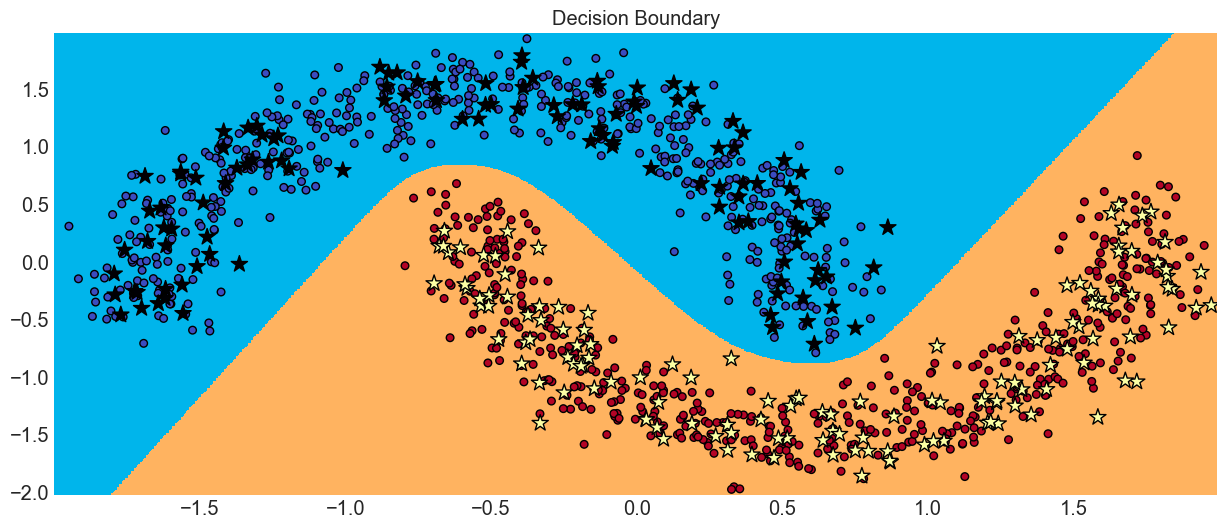

In [28]:
loss_df = pd.DataFrame(loss_hist)

fn_plot_decision_boundary(lambda x: predict(model, x), X_train, y_train, X_test, y_test) # plot decision boundary for this plot

plt.title("Decision Boundary");

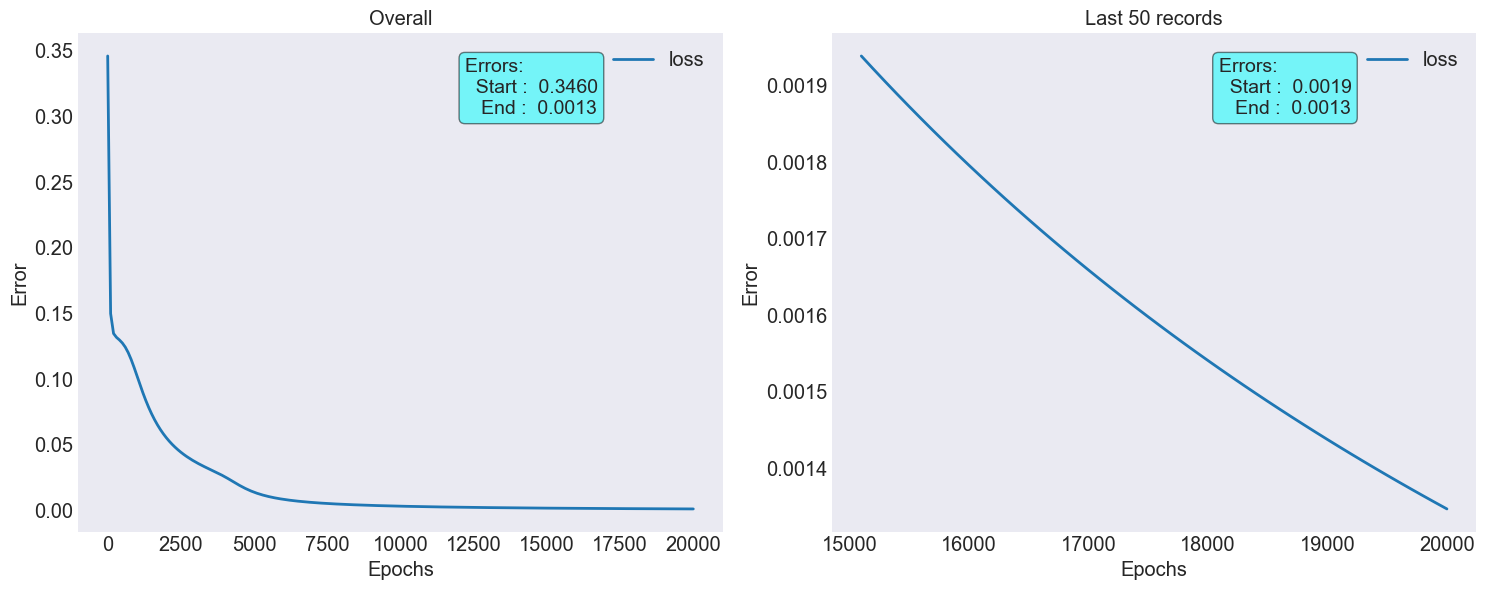

In [29]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

l_range = 50

ax = axes[0]

loss_df.plot(x = 'epoch', y = 'loss', ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Overall')
ax.grid();

ax = axes[1]

loss_df[-l_range:].plot(x = 'epoch', y = 'loss', ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[-l_range]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Last {} records'.format(l_range))
ax.grid();
plt.tight_layout()

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[118,   0],
       [  0, 138]], dtype=int64)

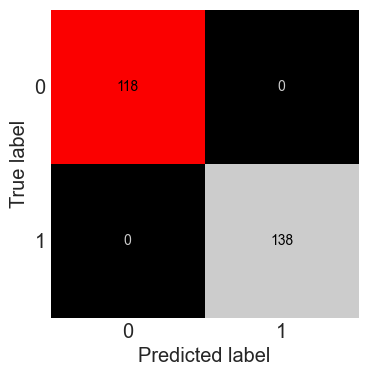

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = [0,1])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'nipy_spectral', colorbar = False)
plt.grid()
plt.show()